In [1]:
# Uncomment this if you dont have any of the packages necessary

# !pip install mne numpy seaborn pandas wfdb scipy

In [2]:
import numpy as np
import os
import mne
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.signal import butter, sosfiltfilt, sosfreqz

import warnings
warnings.filterwarnings("ignore")

## Read Data into memory

In [3]:
# Data parameters
num_subjects = 109
# num_subjects = 1  # Loading all of our data would take 14 GB of memory, so we should just stick to a few subjects at a time
num_trials = 14
num_channels = 64
num_timepoints = 20000
subject_data = np.zeros((num_subjects,num_trials,num_channels,num_timepoints))

# Read all of our data into workspace
for subject in range(1, num_subjects+1):
    for trial in range(1,num_trials+1):
        file = Path("./") / "files" / "eegmmidb" / "1.0.0" / f"S{subject:03}" / f"S{subject:03}R{trial:02}.edf" # Reads files of all subjects dynamically
        try:
            with mne.io.read_raw_edf(file) as data:
                # Load data into subject_data np array
                raw_data = data.get_data()
                # Zero pad if this is a one-minute sample
                if raw_data.shape[1] != num_timepoints:
                    print(raw_data.shape)
                    subject_data[subject-1][trial-1] = np.pad(raw_data,((0,0),(0,num_timepoints - raw_data.shape[1])),'empty') # Add 9760 zero-padding to the right side of raw_data
                else:
                    subject_data[subject-1][trial-1] = raw_data
                # you can get the metadata included in the file and a list of all channels:
                info = data.info
                channels = data.ch_names
        except FileNotFoundError:
            print(f"{file} not found, skipping.")

Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S001\S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 9760)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S001\S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 9760)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S001\S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S001\S001R05.edf...
EDF file detected
Setting channel in

Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S003\S003R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S003\S003R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S003\S003R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S004\S004R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 9760)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S004\S004R02.edf...
EDF file detected
Setting channel info structur

Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S006\S006R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S006\S006R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S006\S006R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S006\S006R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S006\S006R12.edf...
EDF file d

EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S009\S009R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S009\S009R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S009\S009R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S009\S009R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Use

EDF file detected
files\eegmmidb\1.0.0\S012\S012R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S012\S012R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S012\S012R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S012\S012R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S012\S012R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S012\S012R06.edf...
EDF file detected
files\eegmmidb\1.0.0\S012\S012R06.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S012\S012R07.edf...
EDF file detected
files\eegmmidb\1.0.0\S012\S012R07.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S012\S012R08.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S015\S015R01.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S015\S015R02.edf...
EDF file detected
files\eegmmidb\1.0.0\S015\S015R02.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S015\S015R03.edf...
EDF file detected
files\eegmmidb\1.0.0\S015\S015R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S015\S015R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S015\S015R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S015\S015R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S015\S015R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S015\S015R06.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S018\S018R01.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S018\S018R02.edf...
EDF file detected
files\eegmmidb\1.0.0\S018\S018R02.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S018\S018R03.edf...
EDF file detected
files\eegmmidb\1.0.0\S018\S018R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S018\S018R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S018\S018R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S018\S018R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S018\S018R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S018\S018R06.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S021\S021R01.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S021\S021R02.edf...
EDF file detected
files\eegmmidb\1.0.0\S021\S021R02.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S021\S021R03.edf...
EDF file detected
files\eegmmidb\1.0.0\S021\S021R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S021\S021R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S021\S021R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S021\S021R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S021\S021R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S021\S021R06.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S024\S024R01.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S024\S024R02.edf...
EDF file detected
files\eegmmidb\1.0.0\S024\S024R02.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S024\S024R03.edf...
EDF file detected
files\eegmmidb\1.0.0\S024\S024R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S024\S024R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S024\S024R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S024\S024R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S024\S024R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S024\S024R06.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S027\S027R01.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S027\S027R02.edf...
EDF file detected
files\eegmmidb\1.0.0\S027\S027R02.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S027\S027R03.edf...
EDF file detected
files\eegmmidb\1.0.0\S027\S027R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S027\S027R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S027\S027R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S027\S027R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S027\S027R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S027\S027R06.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S030\S030R01.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S030\S030R02.edf...
EDF file detected
files\eegmmidb\1.0.0\S030\S030R02.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S030\S030R03.edf...
EDF file detected
files\eegmmidb\1.0.0\S030\S030R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S030\S030R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S030\S030R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S030\S030R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S030\S030R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S030\S030R06.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S033\S033R01.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S033\S033R02.edf...
EDF file detected
files\eegmmidb\1.0.0\S033\S033R02.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S033\S033R03.edf...
EDF file detected
files\eegmmidb\1.0.0\S033\S033R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S033\S033R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S033\S033R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S033\S033R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S033\S033R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S033\S033R06.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S036\S036R01.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S036\S036R02.edf...
EDF file detected
files\eegmmidb\1.0.0\S036\S036R02.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S036\S036R03.edf...
EDF file detected
files\eegmmidb\1.0.0\S036\S036R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S036\S036R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S036\S036R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S036\S036R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S036\S036R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S036\S036R06.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S039\S039R01.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S039\S039R02.edf...
EDF file detected
files\eegmmidb\1.0.0\S039\S039R02.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S039\S039R03.edf...
EDF file detected
files\eegmmidb\1.0.0\S039\S039R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S039\S039R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S039\S039R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S039\S039R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S039\S039R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S039\S039R06.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S042\S042R01.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S042\S042R02.edf...
EDF file detected
files\eegmmidb\1.0.0\S042\S042R02.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S042\S042R03.edf...
EDF file detected
files\eegmmidb\1.0.0\S042\S042R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S042\S042R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S042\S042R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S042\S042R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S042\S042R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S042\S042R06.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S045\S045R01.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S045\S045R02.edf...
EDF file detected
files\eegmmidb\1.0.0\S045\S045R02.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S045\S045R03.edf...
EDF file detected
files\eegmmidb\1.0.0\S045\S045R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S045\S045R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S045\S045R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S045\S045R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S045\S045R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S045\S045R06.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S048\S048R01.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S048\S048R02.edf...
EDF file detected
files\eegmmidb\1.0.0\S048\S048R02.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S048\S048R03.edf...
EDF file detected
files\eegmmidb\1.0.0\S048\S048R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S048\S048R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S048\S048R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S048\S048R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S048\S048R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S048\S048R06.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S051\S051R01.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S051\S051R02.edf...
EDF file detected
files\eegmmidb\1.0.0\S051\S051R02.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S051\S051R03.edf...
EDF file detected
files\eegmmidb\1.0.0\S051\S051R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S051\S051R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S051\S051R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S051\S051R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S051\S051R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S051\S051R06.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S054\S054R01.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S054\S054R02.edf...
EDF file detected
files\eegmmidb\1.0.0\S054\S054R02.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S054\S054R03.edf...
EDF file detected
files\eegmmidb\1.0.0\S054\S054R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S054\S054R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S054\S054R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S054\S054R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S054\S054R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S054\S054R06.edf...
EDF f

EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S056\S056R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S056\S056R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S057\S057R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 9760)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S057\S057R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 9760)
Extracting EDF parameters from C:\Users

EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S059\S059R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S059\S059R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S059\S059R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S059\S059R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Use

EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S062\S062R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S062\S062R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S062\S062R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S062\S062R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(64, 19680)
Extracting EDF parameters from C:\Use

EDF file detected
files\eegmmidb\1.0.0\S065\S065R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S065\S065R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S065\S065R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S065\S065R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S065\S065R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S065\S065R06.edf...
EDF file detected
files\eegmmidb\1.0.0\S065\S065R06.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S065\S065R07.edf...
EDF file detected
files\eegmmidb\1.0.0\S065\S065R07.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S065\S065R08.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S068\S068R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S068\S068R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S068\S068R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S068\S068R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S068\S068R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S068\S068R06.edf...
EDF file detected
files\eegmmidb\1.0.0\S068\S068R06.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S068\S068R07.edf...
EDF file detected
files\eegmmidb\1.0.0\S068\S068R07.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S068\S068R08.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S071\S071R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S071\S071R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S071\S071R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S071\S071R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S071\S071R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S071\S071R06.edf...
EDF file detected
files\eegmmidb\1.0.0\S071\S071R06.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S071\S071R07.edf...
EDF file detected
files\eegmmidb\1.0.0\S071\S071R07.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S071\S071R08.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S074\S074R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S074\S074R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S074\S074R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S074\S074R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S074\S074R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S074\S074R06.edf...
EDF file detected
files\eegmmidb\1.0.0\S074\S074R06.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S074\S074R07.edf...
EDF file detected
files\eegmmidb\1.0.0\S074\S074R07.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S074\S074R08.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S077\S077R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S077\S077R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S077\S077R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S077\S077R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S077\S077R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S077\S077R06.edf...
EDF file detected
files\eegmmidb\1.0.0\S077\S077R06.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S077\S077R07.edf...
EDF file detected
files\eegmmidb\1.0.0\S077\S077R07.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S077\S077R08.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S080\S080R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S080\S080R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S080\S080R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S080\S080R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S080\S080R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S080\S080R06.edf...
EDF file detected
files\eegmmidb\1.0.0\S080\S080R06.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S080\S080R07.edf...
EDF file detected
files\eegmmidb\1.0.0\S080\S080R07.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S080\S080R08.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S083\S083R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S083\S083R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S083\S083R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S083\S083R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S083\S083R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S083\S083R06.edf...
EDF file detected
files\eegmmidb\1.0.0\S083\S083R06.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S083\S083R07.edf...
EDF file detected
files\eegmmidb\1.0.0\S083\S083R07.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S083\S083R08.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S086\S086R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S086\S086R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S086\S086R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S086\S086R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S086\S086R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S086\S086R06.edf...
EDF file detected
files\eegmmidb\1.0.0\S086\S086R06.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S086\S086R07.edf...
EDF file detected
files\eegmmidb\1.0.0\S086\S086R07.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S086\S086R08.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S089\S089R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S089\S089R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S089\S089R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S089\S089R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S089\S089R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S089\S089R06.edf...
EDF file detected
files\eegmmidb\1.0.0\S089\S089R06.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S089\S089R07.edf...
EDF file detected
files\eegmmidb\1.0.0\S089\S089R07.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S089\S089R08.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S092\S092R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S092\S092R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S092\S092R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S092\S092R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S092\S092R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S092\S092R06.edf...
EDF file detected
files\eegmmidb\1.0.0\S092\S092R06.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S092\S092R07.edf...
EDF file detected
files\eegmmidb\1.0.0\S092\S092R07.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S092\S092R08.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S095\S095R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S095\S095R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S095\S095R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S095\S095R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S095\S095R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S095\S095R06.edf...
EDF file detected
files\eegmmidb\1.0.0\S095\S095R06.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S095\S095R07.edf...
EDF file detected
files\eegmmidb\1.0.0\S095\S095R07.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S095\S095R08.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S098\S098R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S098\S098R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S098\S098R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S098\S098R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S098\S098R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S098\S098R06.edf...
EDF file detected
files\eegmmidb\1.0.0\S098\S098R06.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S098\S098R07.edf...
EDF file detected
files\eegmmidb\1.0.0\S098\S098R07.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S098\S098R08.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S101\S101R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S101\S101R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S101\S101R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S101\S101R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S101\S101R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S101\S101R06.edf...
EDF file detected
files\eegmmidb\1.0.0\S101\S101R06.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S101\S101R07.edf...
EDF file detected
files\eegmmidb\1.0.0\S101\S101R07.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S101\S101R08.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S104\S104R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S104\S104R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S104\S104R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S104\S104R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S104\S104R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S104\S104R06.edf...
EDF file detected
files\eegmmidb\1.0.0\S104\S104R06.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S104\S104R07.edf...
EDF file detected
files\eegmmidb\1.0.0\S104\S104R07.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S104\S104R08.edf...
EDF f

EDF file detected
files\eegmmidb\1.0.0\S107\S107R03.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S107\S107R04.edf...
EDF file detected
files\eegmmidb\1.0.0\S107\S107R04.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S107\S107R05.edf...
EDF file detected
files\eegmmidb\1.0.0\S107\S107R05.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S107\S107R06.edf...
EDF file detected
files\eegmmidb\1.0.0\S107\S107R06.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S107\S107R07.edf...
EDF file detected
files\eegmmidb\1.0.0\S107\S107R07.edf not found, skipping.
Extracting EDF parameters from C:\Users\matta\OneDrive\Documents\GitHub\cogs-189\files\eegmmidb\1.0.0\S107\S107R08.edf...
EDF f

In [4]:
subject_data.shape

(109, 14, 64, 20000)

In [5]:
info

<Info | 8 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>

In [6]:
fs = 160

In [7]:
channels

['Fc5.',
 'Fc3.',
 'Fc1.',
 'Fcz.',
 'Fc2.',
 'Fc4.',
 'Fc6.',
 'C5..',
 'C3..',
 'C1..',
 'Cz..',
 'C2..',
 'C4..',
 'C6..',
 'Cp5.',
 'Cp3.',
 'Cp1.',
 'Cpz.',
 'Cp2.',
 'Cp4.',
 'Cp6.',
 'Fp1.',
 'Fpz.',
 'Fp2.',
 'Af7.',
 'Af3.',
 'Afz.',
 'Af4.',
 'Af8.',
 'F7..',
 'F5..',
 'F3..',
 'F1..',
 'Fz..',
 'F2..',
 'F4..',
 'F6..',
 'F8..',
 'Ft7.',
 'Ft8.',
 'T7..',
 'T8..',
 'T9..',
 'T10.',
 'Tp7.',
 'Tp8.',
 'P7..',
 'P5..',
 'P3..',
 'P1..',
 'Pz..',
 'P2..',
 'P4..',
 'P6..',
 'P8..',
 'Po7.',
 'Po3.',
 'Poz.',
 'Po4.',
 'Po8.',
 'O1..',
 'Oz..',
 'O2..',
 'Iz..']

### Read the annotations file for event timesteps

In [8]:
import wfdb

# Specify the path to the .event file (without the extension)
# file_path = Path("./") / "files" / "eegmmidb" / "1.0.0" / f"S{subject:03}" / f"S{subject:03}R{trial:02}.edf.event" # Reads files of all subjects dynamically
subject = 1
trial = 3
file_path =  f"./files/eegmmidb/1.0.0/S{subject:03}/S{subject:03}R{trial:02}.edf"

# Read the annotation file
annotations = wfdb.rdann(file_path,'event')

# Print annotation sample times
print(annotations.sample)

# Print annotation labels
print(annotations.symbol)

[  672  1328  2000  2656  3328  3984  4656  5312  5984  6640  7312  7968
  8640  9296  9968 10624 11296 11952 12624 13280 13952 14608 15280 15936
 16608 17264 17936 18592 19264]
['"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"', '"']


### Look at subject 1's trials 3 and 4 as an example
Trial 3 is moving left and right fist, trial 4 is imagining moving those fists

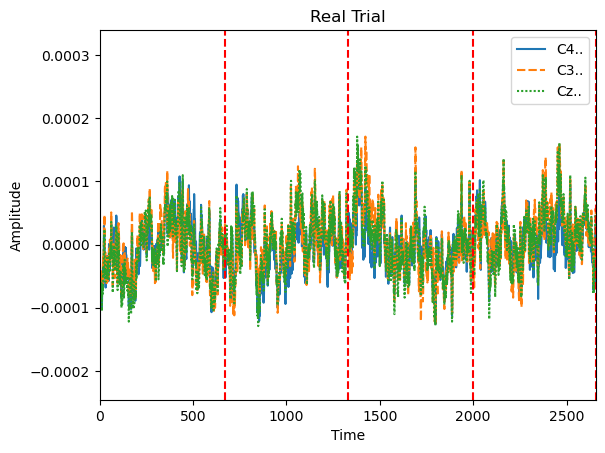

In [9]:
# Example time plot of the 64 channel data
motor_channels = ['C4..','C3..','Cz..']
df = pd.DataFrame(subject_data[0][2].T,columns=channels)  # Transpose to have 64 channels as columns
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# # Plot the data using seaborn
# sns.set(style="whitegrid")
# plt.figure(figsize=(10, 6))

# # Create a line plot for each channel
# sns.lineplot(data=df[df.columns == motor_channels], dashes=False)

# Select the columns from the DataFrame
selected_channels = df[motor_channels]

# Plot the selected channels using seaborn
sns.lineplot(data=selected_channels)

for x in annotations.sample:
    plt.axvline(x=x, color='r', linestyle='--', label=f'x = {x}')

plt.xlim(0, annotations.sample[3])
    
plt.title("Real Trial")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

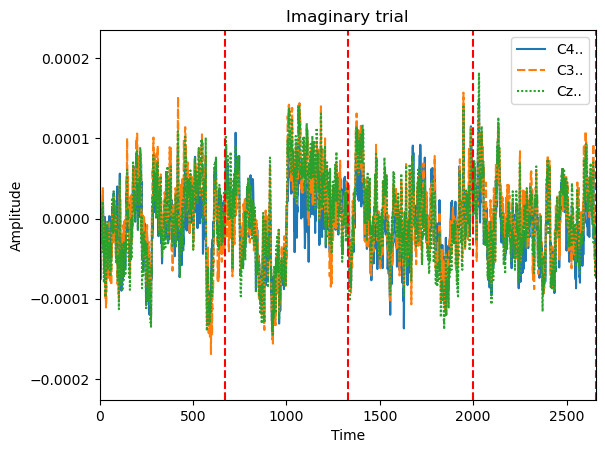

In [10]:
motor_channels = ['C4..','C3..','Cz..']
df = pd.DataFrame(subject_data[0][3].T,columns=channels)  # Transpose to have 64 channels as columns

selected_channels = df[motor_channels]

subject = 1
trial = 4
file_path =  f"./files/eegmmidb/1.0.0/S{subject:03}/S{subject:03}R{trial:02}.edf"

# Read the annotation file
annotations = wfdb.rdann(file_path,'event')

# Plot the selected channels using seaborn
sns.lineplot(data=selected_channels)

for x in annotations.sample:
    plt.axvline(x=x, color='r', linestyle='--', label=f'x = {x}')

plt.xlim(0, annotations.sample[3])

plt.title("Imaginary trial")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Filter the two trials, looking at motor, parietal, and frontal cortex

In [11]:
def butter_bandpass(lowcut, highcut, fs, order = 2):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog = False, btype = 'band', output = 'sos')
        return sos
    
def filtered_trial(subject_data, subject=1, trial=3, num_targets=4,motor_channels=['C4..','C3..','Cz..'],plot_title="Title"):
    num_channels = len(motor_channels)
    
    df = pd.DataFrame(subject_data[subject-1][trial-1].T,columns=channels)  # Transpose to have 64 channels as columns

    # Create a figure and a set of subplots (e.g., 2 rows, 2 columns)
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,12))
    
    # Read the annotation file
    file_path =  f"./files/eegmmidb/1.0.0/S{subject:03}/S{subject:03}R{trial:02}.edf"
    annotations = wfdb.rdann(file_path,'event')

    selected_channels = df[motor_channels]

    sos_alpha = butter_bandpass(8, 12, fs, order = 10)
    sos_beta = butter_bandpass(13, 30, fs, order = 10)
    sos_gamma = butter_bandpass(30, 79, fs, order = 10)

    alpha_df = selected_channels.apply(lambda x: sosfiltfilt(sos_alpha, x))
    beta_df = selected_channels.apply(lambda x: sosfiltfilt(sos_beta, x))
    gamma_df = selected_channels.apply(lambda x: sosfiltfilt(sos_gamma, x))

    sns.lineplot(data=alpha_df,ax=axes[0])
    sns.lineplot(data=beta_df,ax=axes[1])
    sns.lineplot(data=gamma_df,ax=axes[2])

    titles = ['Alpha (8-12 Hz)','Beta (13-30 Hz)','Gamma (30-79 Hz)']
    for x in annotations.sample:
        for i in range(3):
            axes[i].set_xlim(0, annotations.sample[num_targets-1])
            axes[i].axvline(x=x, color='r', linestyle='--', label=f'x = {x}')
            axes[i].set_title(titles[i])

    plt.suptitle(plot_title, fontsize=16)
    plt.xlabel("Timesteps")
    plt.ylabel("Amplitude")
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

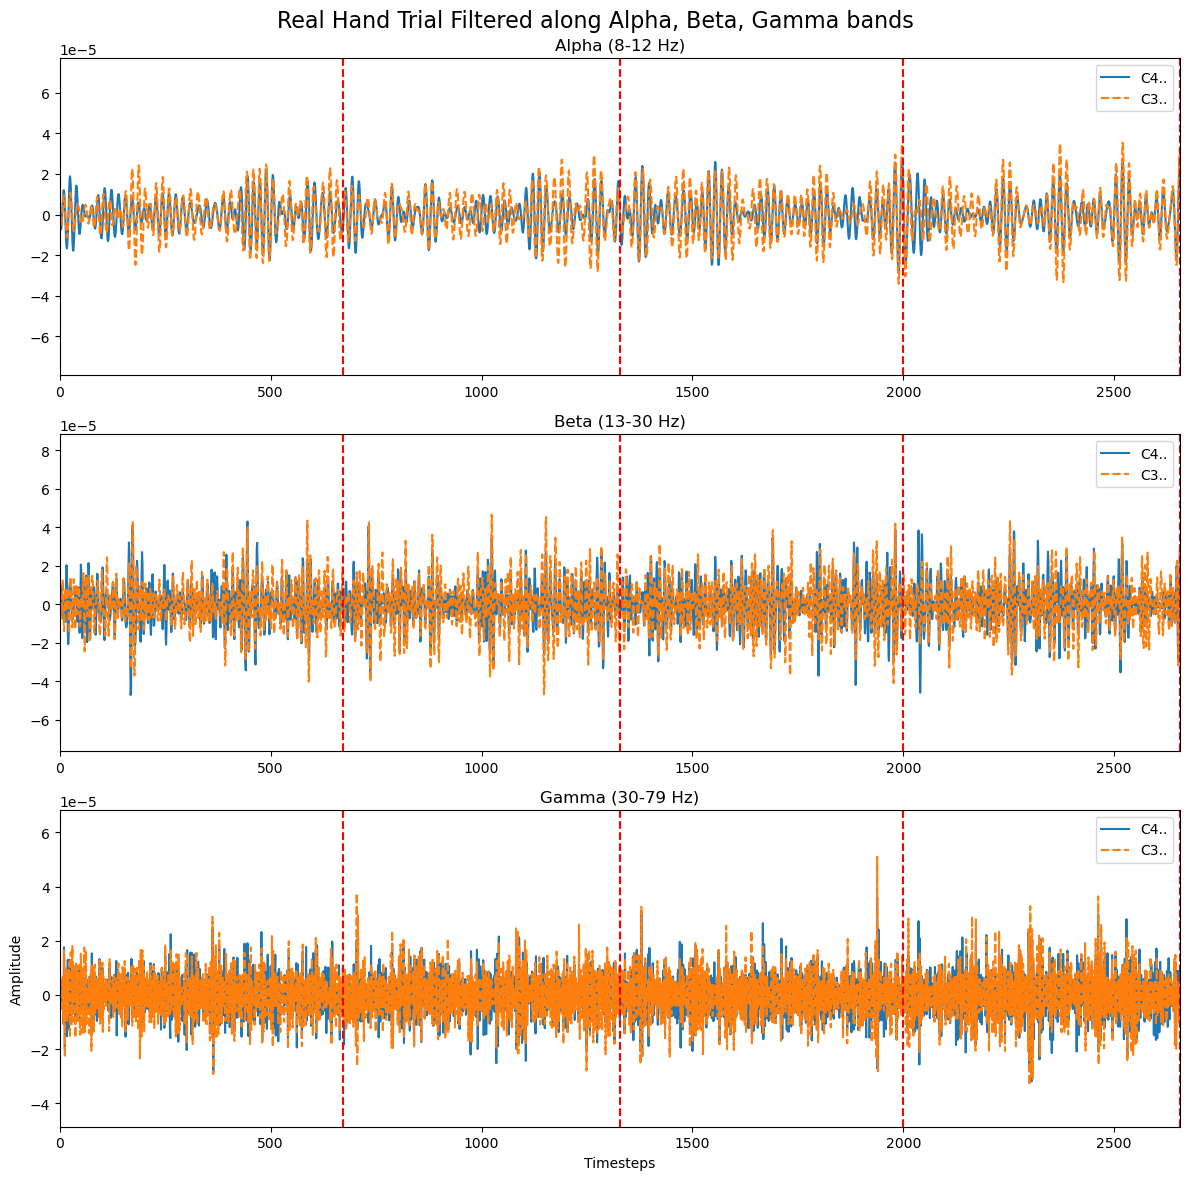

In [12]:
filtered_trial(
    subject_data,
    subject=1,
    trial=3,
    motor_channels=['C4..','C3..'],
    plot_title="Real Hand Trial Filtered along Alpha, Beta, Gamma bands")

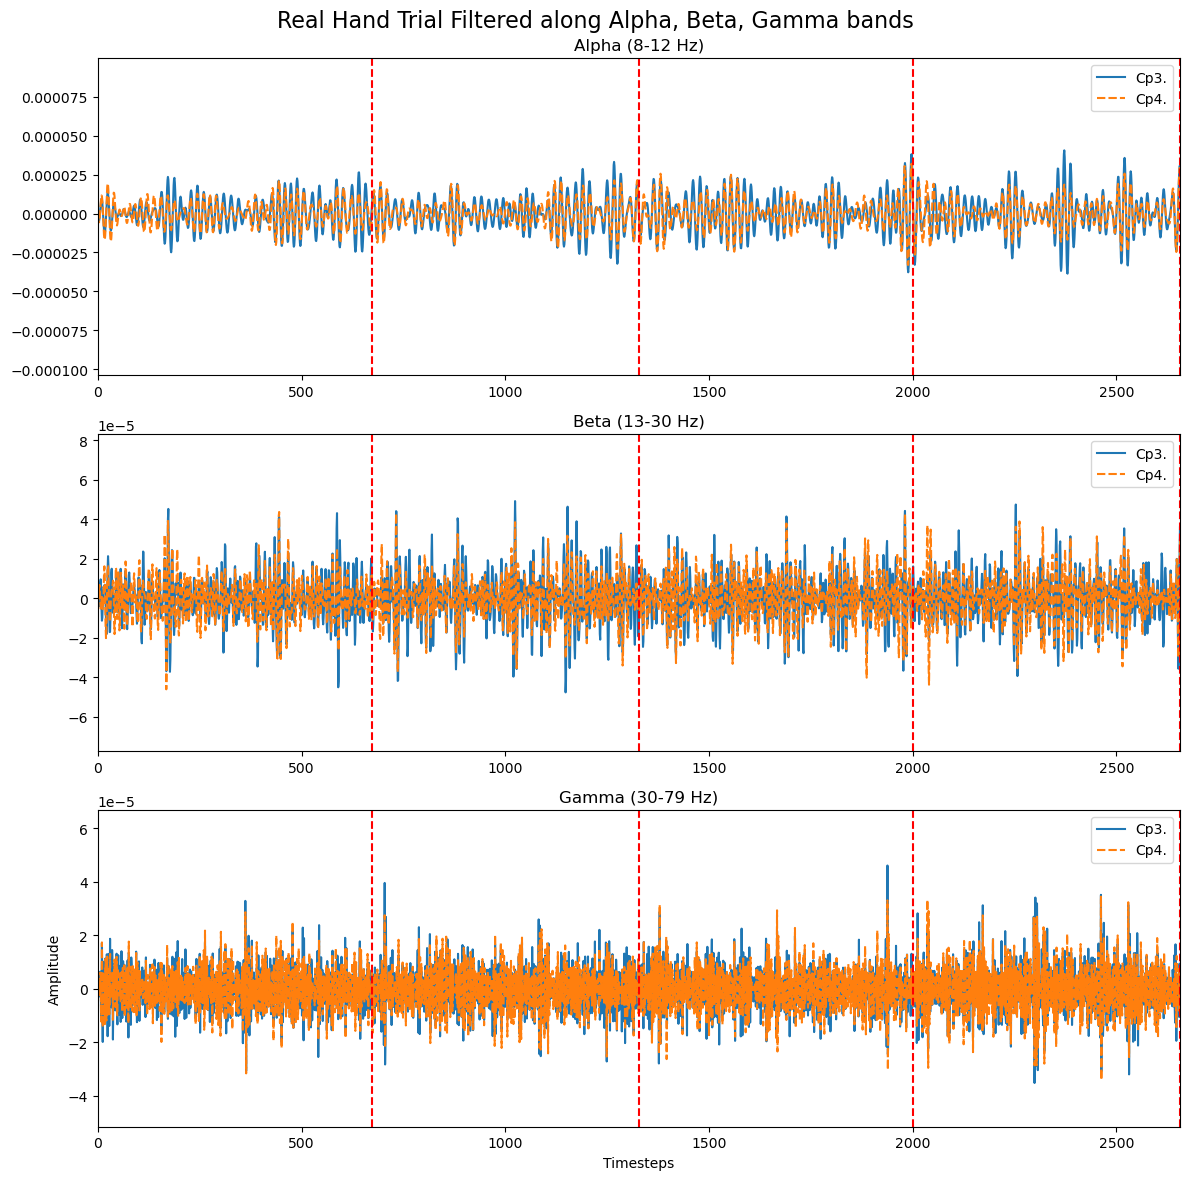

In [13]:
filtered_trial(
    subject_data,
    subject=1,
    trial=3,
    motor_channels=['Cp3.','Cp4.'],
    plot_title="Real Hand Trial Filtered along Alpha, Beta, Gamma bands")

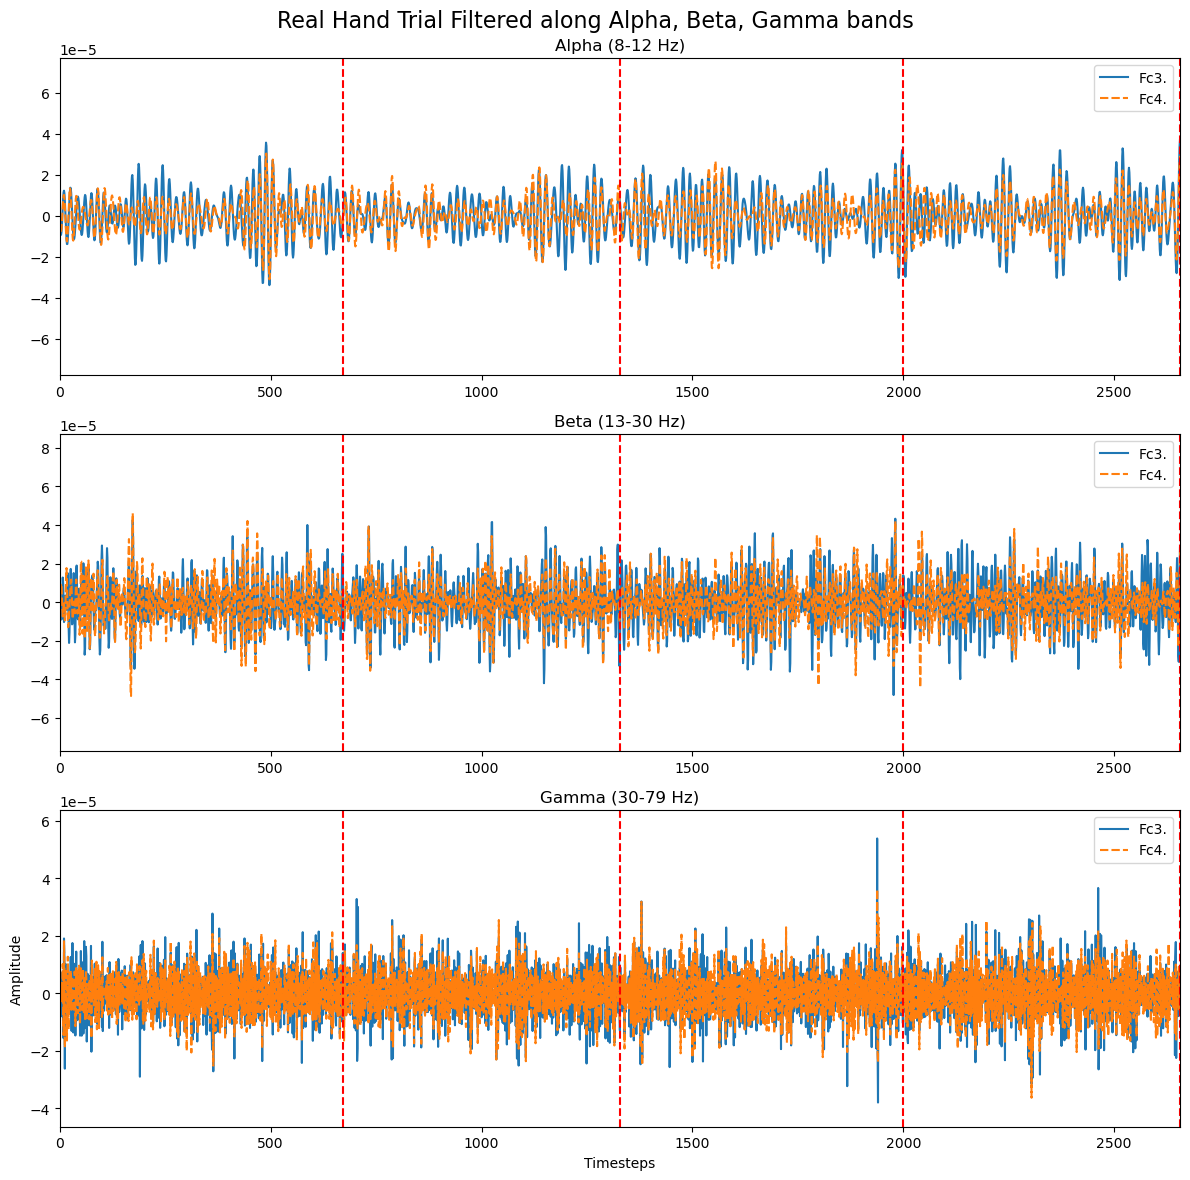

In [14]:
filtered_trial(
    subject_data,
    subject=1,
    trial=3,
    motor_channels=['Fc3.','Fc4.'],
    plot_title="Real Hand Trial Filtered along Alpha, Beta, Gamma bands")

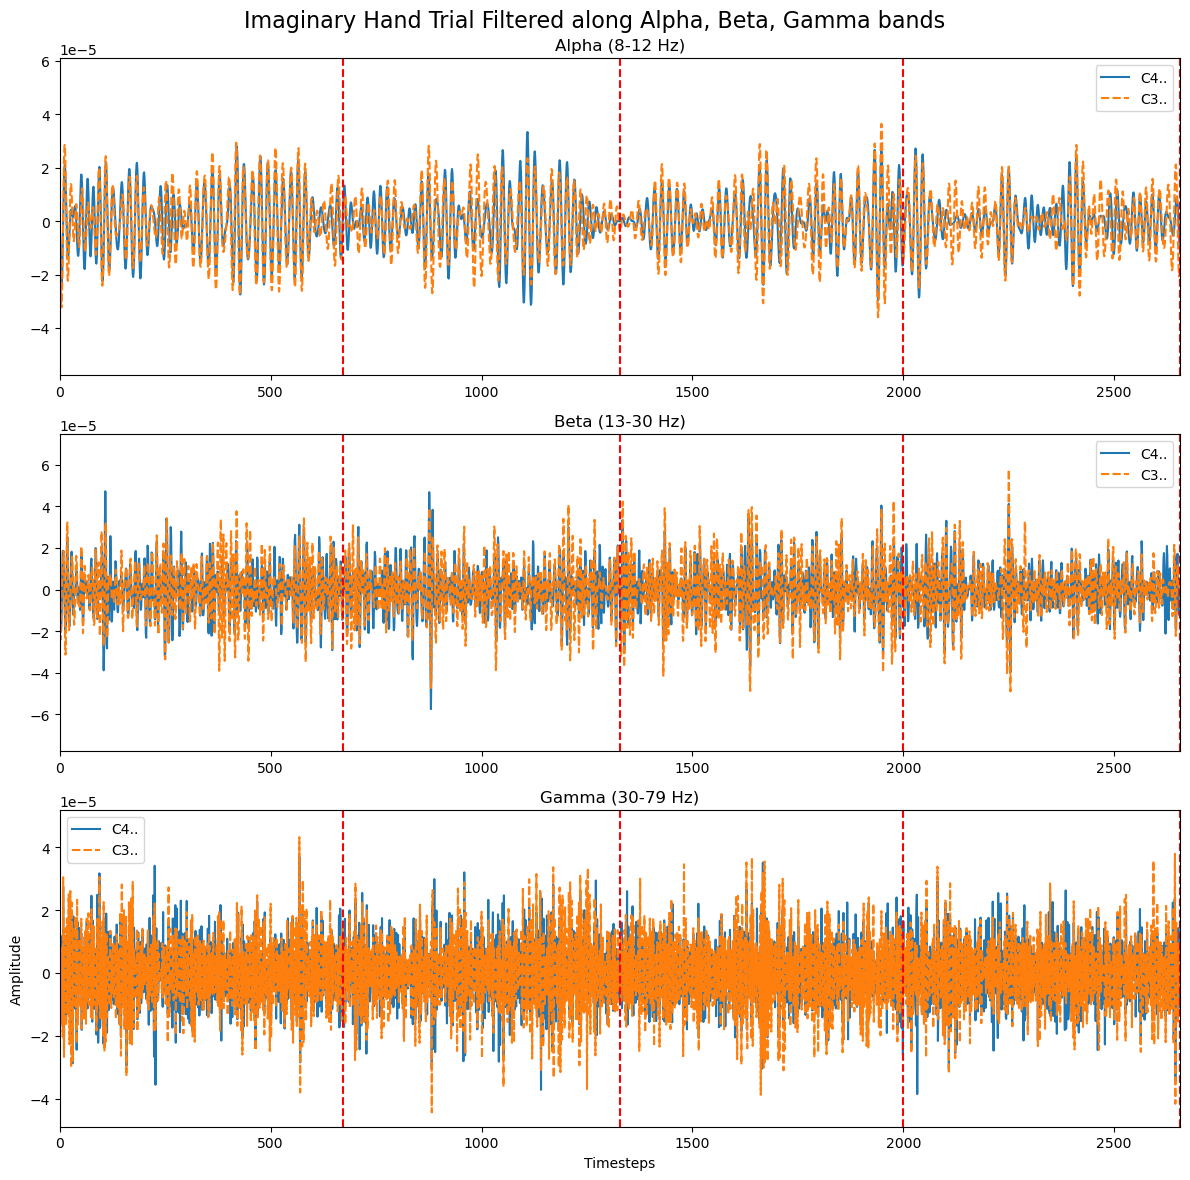

In [15]:
filtered_trial(
    subject_data,
    subject=1,
    trial=4,
    motor_channels=['C4..','C3..'],
    plot_title="Imaginary Hand Trial Filtered along Alpha, Beta, Gamma bands")

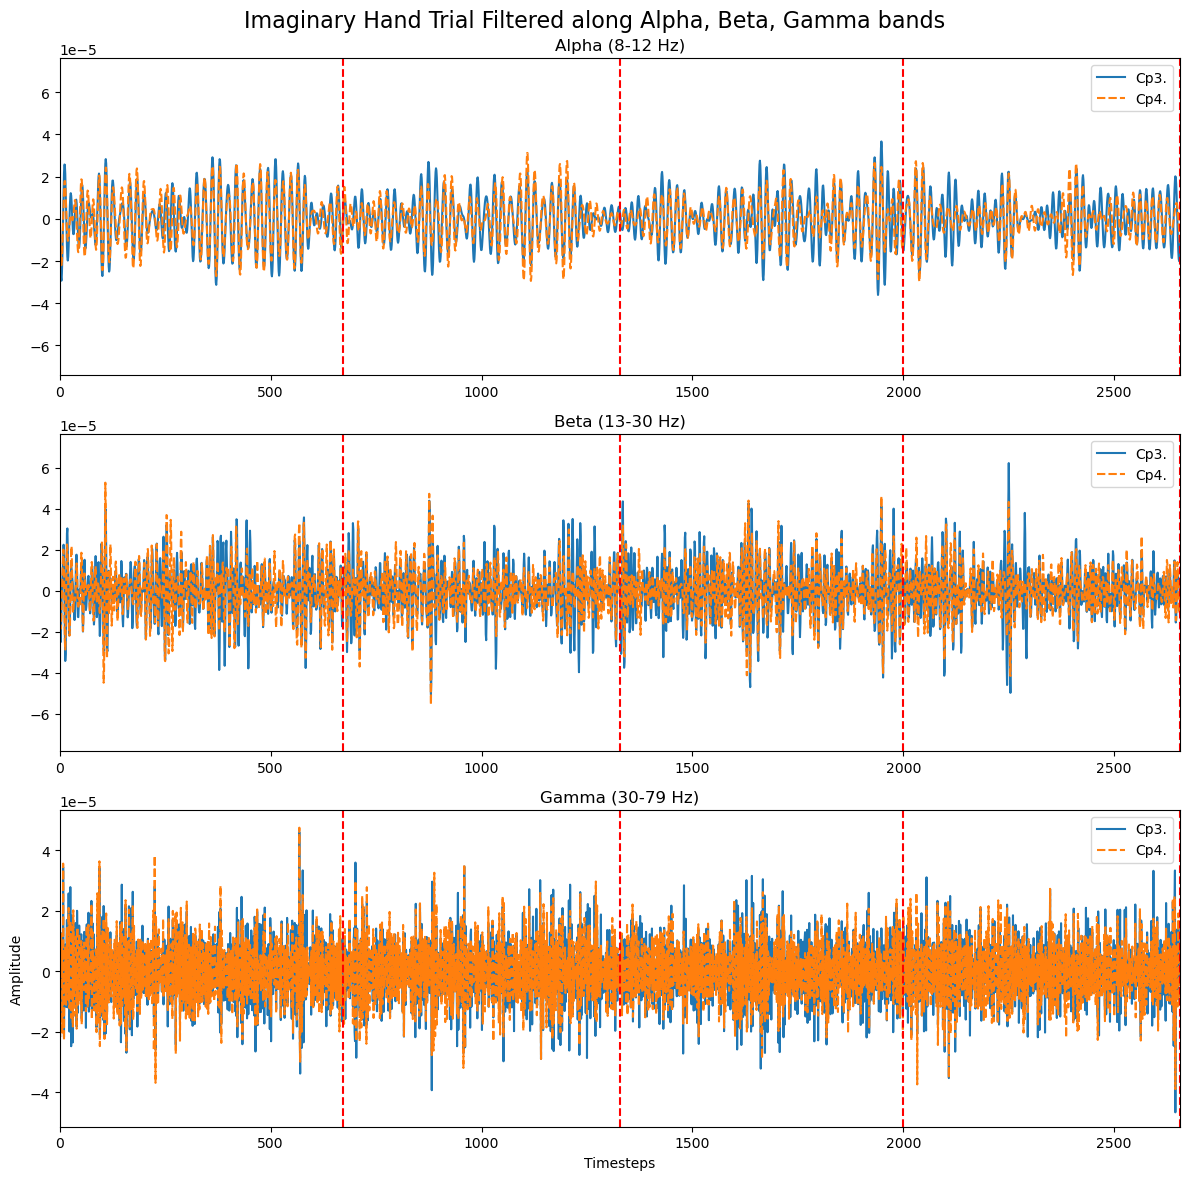

In [16]:
filtered_trial(
    subject_data,
    subject=1,
    trial=4,
    motor_channels=['Cp3.','Cp4.'],
    plot_title="Imaginary Hand Trial Filtered along Alpha, Beta, Gamma bands")

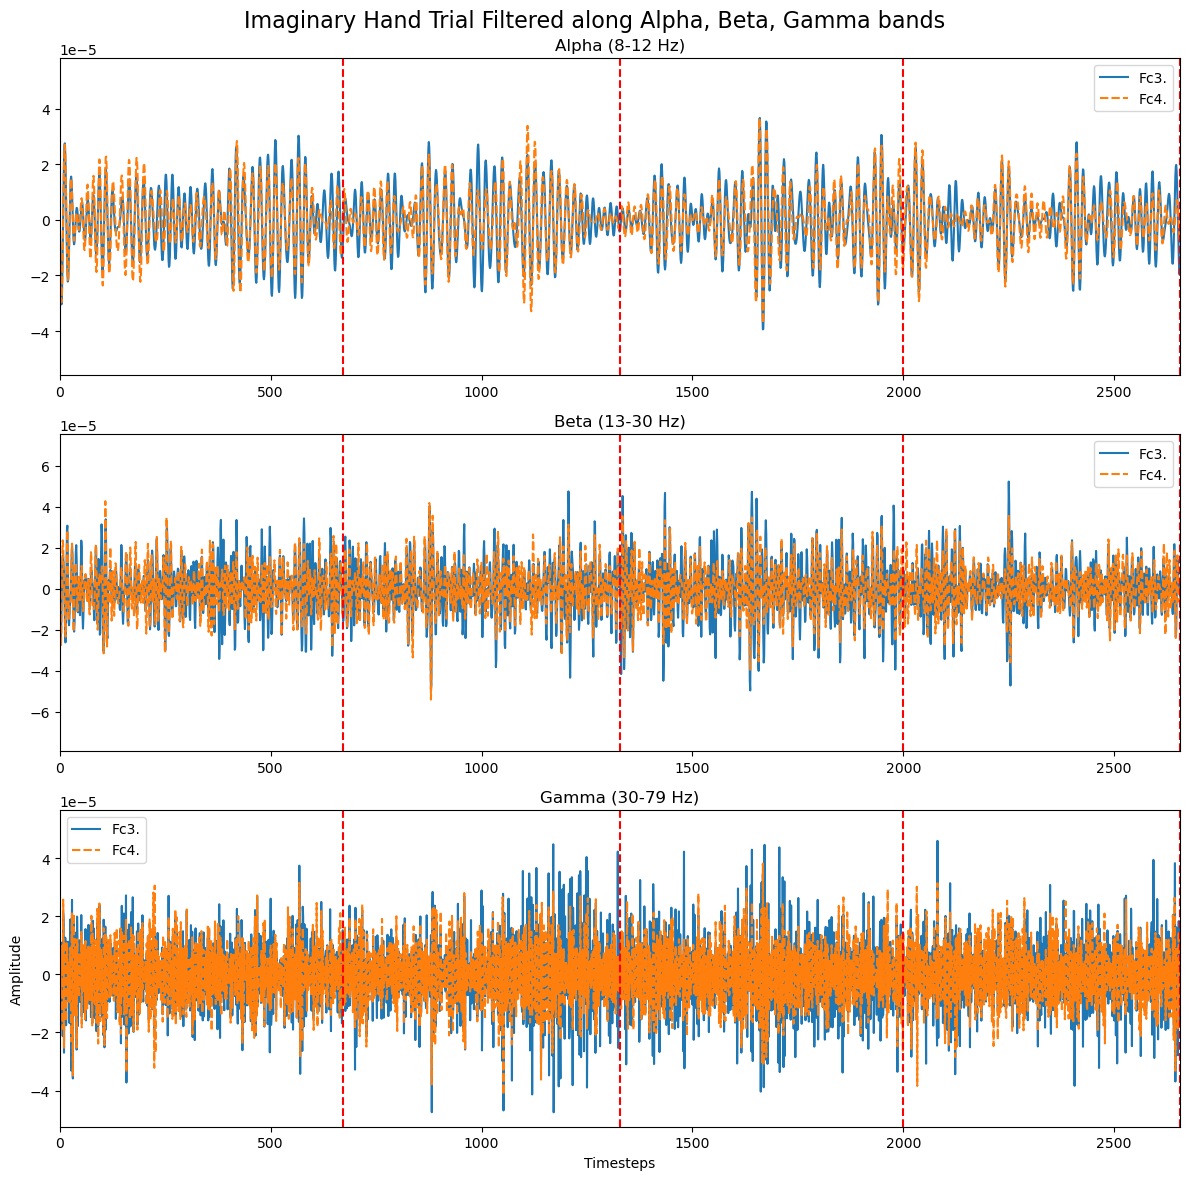

In [17]:
filtered_trial(
    subject_data,
    subject=1,
    trial=4,
    motor_channels=['Fc3.','Fc4.'],
    plot_title="Imaginary Hand Trial Filtered along Alpha, Beta, Gamma bands")